# Script for studying the use of graphs in python:

In [1]:
import numpy as np
from random import uniform,randint
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy import signal
import networkx as nx
import math
from numpy import meshgrid
#import jgraph as ig
from six.moves import input

In [2]:
from modules.distances import l1dist, l2dist, distgraph

In [16]:
## Sorting point masses into the 2D space:
xmin = -0.0
xmax = +10.0
ymin = -140.0
ymax = +10.0
npoints = 20
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [17]:
for i in range(npoints):
    node[i] = int(i)
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)
    
print (x), y, node

[3.3902041  5.99997474 0.89655376 3.56733021 4.50790877 3.70238318
 6.46739533 8.3924427  7.74207724 6.53981599 5.04772709 6.74888447
 4.41661972 7.82086555 3.31684524 7.43128463 6.38201268 8.19594565
 3.62709189 4.60020949] [ -16.6784718   -58.7942665   -92.45175864  -66.22116624   -6.0374079
    4.03266392    0.67231347  -35.08499853  -13.51149707  -95.33928039
  -87.08369158    6.93482091 -108.13524116 -118.66532698  -19.80797698
 -108.03358585  -26.8270448  -101.29354967  -45.80342887  -10.3347054 ] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


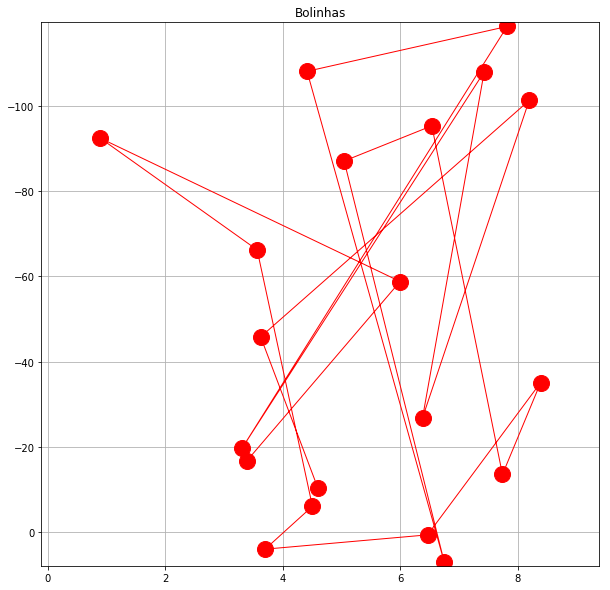

In [18]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
p1 = plt.plot(x, y, color='red', marker='o', linestyle='solid',
        linewidth=1, markersize=16 )

plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [25]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i ,pos=(x[i],y[i]))
    for j in range(npoints):
        S.add_edge(i,j,weight=l2dist(x,y)[i][j])
TS = nx.minimum_spanning_tree(S)

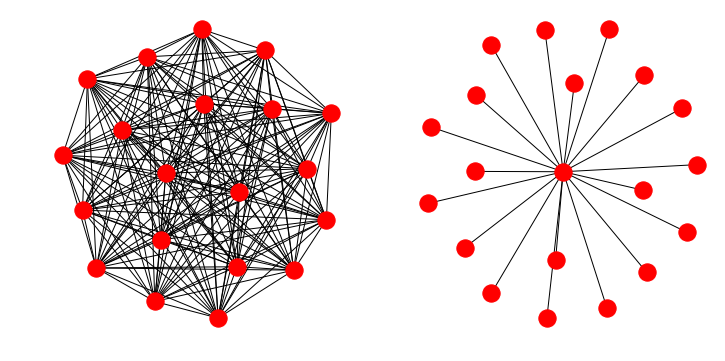

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

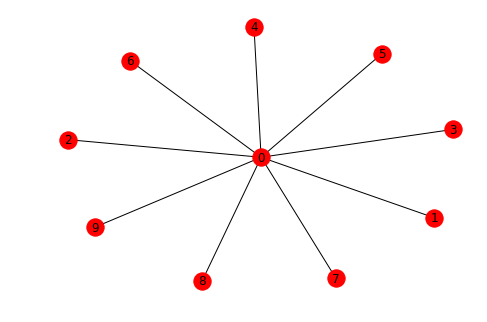

In [13]:
#TENTANDO COLOCAR LABELS NOS VERTICES
nx.draw(TS, with_labels = True)
plt.savefig('labels.png')

# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})^2$

In [21]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi, dmst = distgraph(TS)
print(phi, dmst)

(0.0, 1.0)


0 3.3902041015820803 -16.678471797581878 1 5.999974736273963 -58.79426650262462
0 3.3902041015820803 -16.678471797581878 2 0.8965537626685682 -92.4517586380151
0 3.3902041015820803 -16.678471797581878 3 3.5673302129638795 -66.2211662410807
0 3.3902041015820803 -16.678471797581878 4 4.507908768593363 -6.037407896704281
0 3.3902041015820803 -16.678471797581878 5 3.7023831761003203 4.032663916231627
0 3.3902041015820803 -16.678471797581878 6 6.4673953280657805 0.6723134728965192
0 3.3902041015820803 -16.678471797581878 7 8.392442704855048 -35.08499853330797
0 3.3902041015820803 -16.678471797581878 8 7.742077236731534 -13.511497067729138
0 3.3902041015820803 -16.678471797581878 9 6.539815991415256 -95.33928038773956
0 3.3902041015820803 -16.678471797581878 10 5.047727085864055 -87.0836915840558
0 3.3902041015820803 -16.678471797581878 11 6.748884466089711 6.934820909081282
0 3.3902041015820803 -16.678471797581878 12 4.416619721528026 -108.13524115540191
0 3.3902041015820803 -16.67847179758

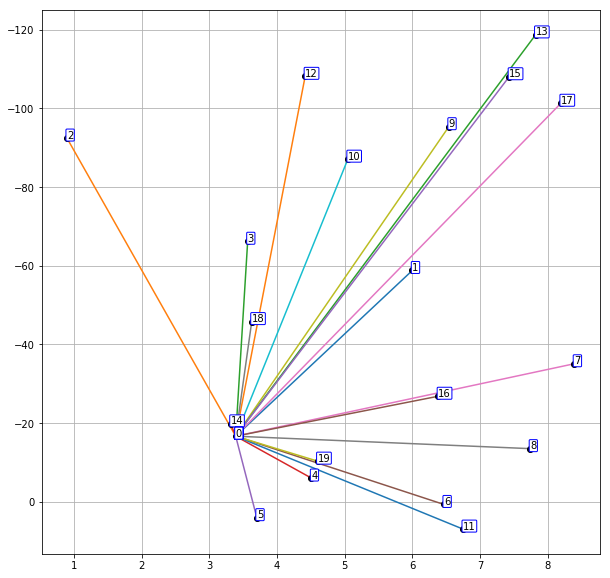

In [22]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.1", fc="white", ec="b", lw=1)

for (i, j, d) in TS.edges.data('weight'):
    xt = [ x[i], x[j] ]
    yt = [ y[i], y[j] ]
    print i, x[i] ,y[i] , j, x[j] , y[j]
    plt.annotate( int(node[i]), xy=(x[i],y[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(x[j],y[j]) , bbox=bbox_props)
    plt.plot(xt,yt,'.-')

plt.grid()
p1 = plt.plot(x, y, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

# TODO: Fazer testes simples para verificar a função distGraf:
> 1) um circulo de pontos igualmente espaçados e aleatorios; <br>
> 2) um retangulo de pontos igualmente espaçados e aleatórios; <br>
> 3) plotar a àrvore com os índices dos vértices para identificação;<br>

In [ ]:
#PLOTA UM L PARA TESTAR A FUNCAO DISTGRAPH E O NETWORKX
ax = np.linspace(-5,5,npoints)
ay = np.zeros(npoints)
ay = 5 + ay
by = np.linspace(-5,5,npoints)
bx = np.zeros(npoints)
bx = -5 + bx
ax1 = np.linspace(-5,5,npoints)
ay1 = np.zeros(npoints)
ay1 = -5 + ay1
by1 = np.linspace(-5,5,npoints)
bx1 = np.zeros(npoints)
bx1 = 5 + bx1

a = np.zeros(2*npoints)
b = np.zeros(2*npoints)

for i in range(0,npoints):
    a[i] = ax[i]
for i in range(npoints,2*npoints):
    a[i] = ay[i - npoints]
b = np.zeros(2*npoints)
for i in range(0,npoints):
    b[i] = bx[i]
for i in range(npoints+1,2*npoints):
    b[i] = by[i - npoints]
L = (a,b)
plt.plot(a,b)
plt.grid()
plt.show()

In [ ]:
S1 = nx.Graph()
for i in range(2*npoints):
    S1.add_node(i ,pos=(L[0][i],L[1][i]))
    for j in range(2*npoints):
        S1.add_edge(i,j,weight=l2dist(a,b)[i][j])
TS1 = nx.minimum_spanning_tree(S1)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S1)
plt.subplot(122)
nx.draw(TS1)
plt.show()

In [ ]:
#Calculating the phi funtcion and the mean
phi1, dmst1 = distgraph(TS1)
print(phi1, dmst1) #this makes sense since the average is close enough to every point

In [ ]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )
for (i, j, d) in TS1.edges.data('weight'): 
    print(d)
    at = [ a[i], a[j] ]
    bt = [ b[i], b[j] ]
    plt.plot(at,bt,'.-')
plt.grid()
plt.savefig('L2dist.pdf')
plt.show()